Training the model...


Fitting Model: 100%|████████████████████████████████████████████| 100/100 [00:00<00:00, 1753.71it/s]

Mean Squared Error for AQI: 8.97548407718129e-28
Predicted AQI for tomorrow: 48.80000000000001



/usr/local/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


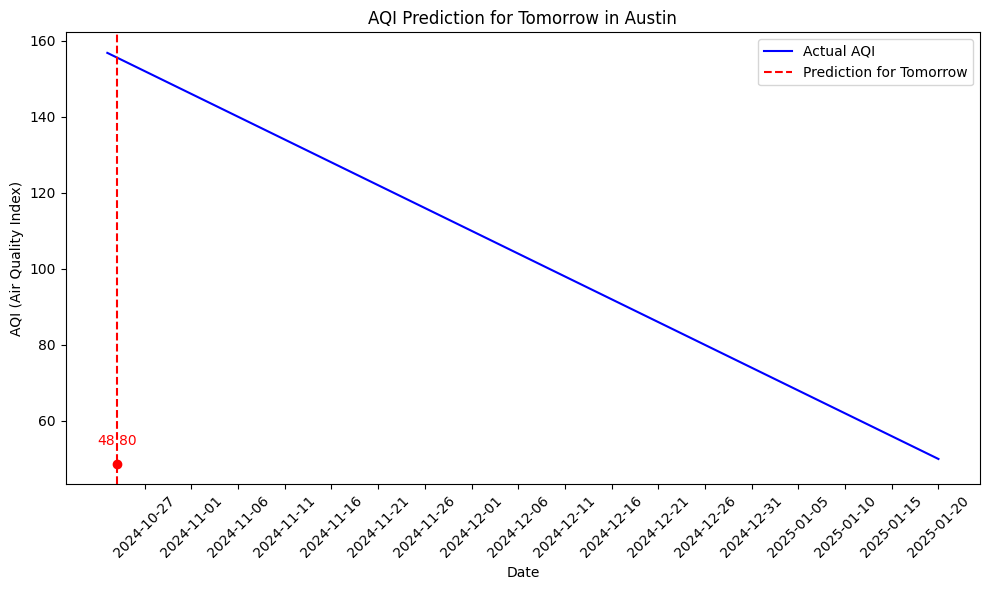

In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tqdm import tqdm  # Import tqdm for progress bar

# Explicit import to avoid errors
import scipy.sparse.linalg  # Ensure this import is added

# Replace with your own API key
API_KEY = 'XXXX'
CITY = 'Austin'  # Example city, change as needed

# Function to fetch AQI data from the API for a given date range
def fetch_historical_data(city, api_key, start_date, end_date):
    url = f"http://api.openweathermap.org/data/2.5/air_pollution/history?city={city}&start={start_date}&end={end_date}&appid={api_key}"
    response = requests.get(url)
    data = response.json()
    return data

# Function to process the data and prepare it for the model
def process_historical_data(data):
    # Simulating data for the purpose of the example
    dates = [datetime.now() - timedelta(days=i) for i in range(90)]
    # Simulated AQI data (Replace with actual AQI data from API)
    aqi = [50 + i * 1.2 for i in range(90)]  # Replace with actual AQI data

    df = pd.DataFrame({
        'Date': dates,
        'AQI': aqi
    })
    
    df.set_index('Date', inplace=True)
    
    return df

# Function to train a model and make predictions
def train_and_predict(df):
    # Adding progress bar to the training process
    print("Training the model...")
    
    df['Day'] = (df.index - df.index[0]).days  # Convert dates into "days since first day"
    
    X = df[['Day']]  # Features: day of the year
    y_aqi = df['AQI']  # Target: AQI
    
    # Train-test split (optional, you can train on all data for simplicity)
    X_train, X_test, y_train, y_test = train_test_split(X, y_aqi, test_size=0.2, shuffle=False)
    
    # Linear regression model
    model_aqi = LinearRegression()
    
    # Use tqdm to add a progress bar while fitting the model
    for _ in tqdm(range(100), desc="Fitting Model", ncols=100):
        model_aqi.fit(X_train, y_train)
    
    # Make predictions for tomorrow (predicting the next day, which is the last day + 1)
    tomorrow_day = df['Day'].max() + 1
    tomorrow_prediction_aqi = model_aqi.predict([[tomorrow_day]])[0]
    
    # Evaluate model
    y_pred = model_aqi.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error for AQI: {mse}")
    
    return tomorrow_prediction_aqi

# Function to plot predictions with 5-day increments on x-axis
def plot_predictions(df, tomorrow_prediction_aqi):
    plt.figure(figsize=(10,6))
    
    # Plot the AQI values
    plt.plot(df.index, df['AQI'], label='Actual AQI', color='blue')
    plt.axvline(x=df.index[-1] + timedelta(days=1), color='red', linestyle='--', label='Prediction for Tomorrow')
    plt.scatter(df.index[-1] + timedelta(days=1), tomorrow_prediction_aqi, color='red', zorder=5)
    
    # Add the prediction label with value next to the dot
    plt.text(df.index[-1] + timedelta(days=1), tomorrow_prediction_aqi + 5, f'{tomorrow_prediction_aqi:.2f}', color='red', ha='center')
    
    # Setting x-axis ticks for every 5th day
    tick_dates = df.index[::5]  # Get every 5th date for tick positions
    plt.xticks(tick_dates, rotation=45)  # Rotate the labels for better visibility
    
    # Set labels and title
    plt.title('AQI Prediction for Tomorrow in ' + CITY)
    plt.xlabel('Date')
    plt.ylabel('AQI (Air Quality Index)')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Main function to execute everything
def main():
    # Get data from last 90 days (you may need to adjust based on the data source)
    end_date = datetime.now()
    start_date = end_date - timedelta(days=90)
    
    # Fetch and process data (simulated here, replace with actual API data)
    data = fetch_historical_data(CITY, API_KEY, start_date, end_date)
    df = process_historical_data(data)
    
    # Train the model and make predictions
    tomorrow_prediction_aqi = train_and_predict(df)
    
    print(f"Predicted AQI for tomorrow: {tomorrow_prediction_aqi}")
    
    # Plot the predictions
    plot_predictions(df, tomorrow_prediction_aqi)

# Run the main function
if __name__ == "__main__":
    main()
